# Classification task using a perceptron

Create a dataset with three classes, each class has N objects, represented by two variables X1 and X2 according to the following requirements:

+ N is equal to 500
+ X1 is distributed:
    1. for class 1, a normal distribution with mean -1 and standard deviation 0.5
    2. for class 2, a normal distribution with mean 2.5 and standard deviation 1
    3. for class 3, a normal distribution with mean 4 and standard deviation 1
+ X2 is distributed:
    1. for class 1, an exponential distribution with scale parameter 3
    2. for class 2, a lognormal distribution with mean 0.5 and standard deviation 0.5
    3. for class 3, a Poisson distribution with lambda 2.0 plus a constant equal to 5

Each object has a label y attached (1, 2, or 3).

In [19]:
import numpy as np

# setting the seed
np.random.seed(540)

# number of samples
N = 500

# class 1
X1_1 = np.random.normal(loc=-1, scale=0.5, size=N)
X1_2 = np.random.exponential(scale=3, size=N)

# class 2
X2_1 = np.random.normal(loc=2.5, scale=1, size=N)
X2_2 = np.random.lognormal(mean=0.5, sigma=0.5, size=N)

# class 3
X3_1 = np.random.normal(loc=4, scale=1, size=N)
X3_2 = np.random.poisson(lam=2, size=N) + 5

# labels
Y1 = np.ones(N)
Y2 = np.ones(N) * 2
Y3 = np.ones(N) * 3

## Plot the points

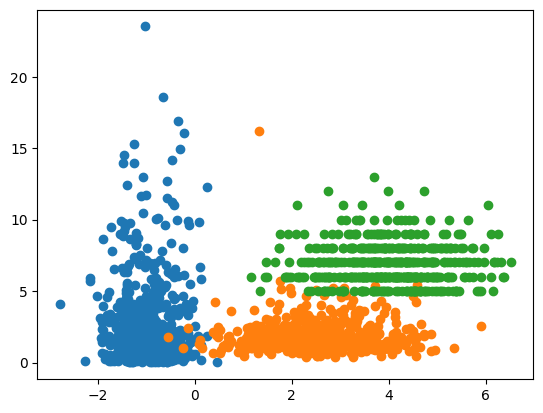

In [20]:
import matplotlib.pyplot as plt

# display class 1
plt.scatter(X1_1, X1_2)

# display class 2
plt.scatter(X2_1, X2_2)

# display class 2
plt.scatter(X3_1, X3_2)

## Create data matrix

Create a matrix of points X (each row is an object) and a vector y of labels. Remember that we need the coordinate X0 for the bias term (all ones).

In [21]:
# bias
X_0 = np.ones(3 * N)

# feature 1
X_1 = np.concatenate((X1_1, X2_1, X3_1))

# feature 2
X_2 = np.concatenate((X1_2, X2_2, X3_2))

# dataset X
X = np.stack((X_0, X_1, X_2), axis=1)

# label vector
y = np.concatenate((Y1, Y2, Y3))

## Choose category 

We want to train a binary classifier for class 1. To this purpose, create a vector of labels y_class that contains 1 for each object belonging to the class under study (positive class) and -1 for all the other objects.


In [22]:
# choosen label
positive_class = 2

# new label vector
y_class = - np.ones_like(y)

# set positive labels
y_class[ y == positive_class] = 1


### Plot this binary problem

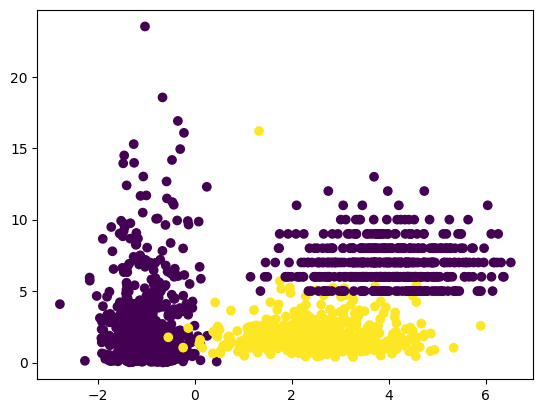

In [23]:
# plot datapoints
plt.scatter(X_1, X_2, c=y_class)

## Define the Sum of squares error function

Write the function sse(X, y, w) that takes the data matrix X, the labels y, and the vector of paraterers w and computes the error in terms of sum of squares.

In [24]:
def sse(X:np.matrix, y:np.array, w:np.array) -> float:
    return np.sum( np.square( y - np.dot(X, w) ) ) / 2

## Train the perceptron with a mini-batch stochastic gradient descent

Set the values of the vector of parameters w with values drawn from a uniform distribution within the range \[-1. 1\].
Use a learning parameter eta equal to 1e-5 and a batch size of 10 objects. Set the maximum number of epochs to 100.
Save in the vector sse_epoch, the values of the sum of squares error for each epoch. Save in the vector errors_epoch, the number of objects misclassified at each epoch.
Remember to shuffle the dataset at each epoch.

In [25]:
# weight vector
w = np.random.uniform(low=-1, high=1, size=X.shape[1])

# learning rate
eta = 1e-5

# epochs
max_epochs = 100
current_epoch = 0

# stochatic approach
batch_size = 10

# errors
sse_epoch = np.zeros(max_epochs)
errors_epoch = np.zeros(max_epochs)

# training
while current_epoch < max_epochs:

    # save sum of squared errors
    sse_epoch[current_epoch] = sse(X, y_class, w)

    # errors per epoch
    errors_epoch[current_epoch] = np.sum( y_class * np.sign(np.dot(X, w)) < 0 )

    # shuffle the dataset
    random_permutation = np.random.permutation(range(y_class.size))
    X = X[random_permutation, :]
    y_class = y_class[random_permutation]

    # mini-batch update
    for i in range(0, y_class.size, batch_size):

        # get batch
        X_batch = X[i : (i + batch_size), :]
        y_batch = y_class[i : (i + batch_size)]

        # update rule
        w += 2 * eta * np.dot(np.transpose(X_batch), y_batch - np.dot(X_batch, w)) / batch_size

    current_epoch += 1


Display raw the plots containing the solution found.

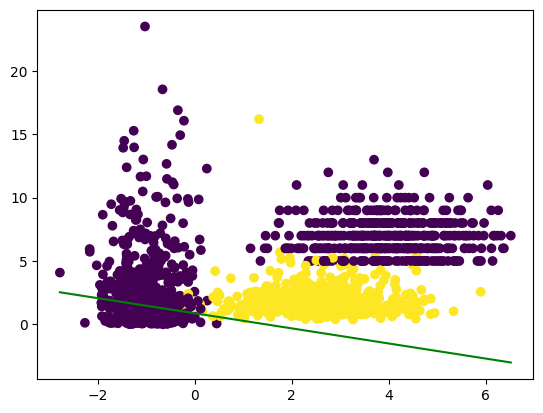

In [26]:
# plot the shuffled data
plt.scatter(X[:, 1], X[:, 2], c=y_class)

# plot solution
plt.plot([ np.min(X[:, 1]), np.max(X[:, 1]) ],
         [ - np.min(X[:, 1]) * w[1]/w[2] - w[0]/w[2], - np.max(X[:, 1]) * w[1]/w[2] - w[0]/w[2] ],
         color='green')

## Plot number of errors per epoch

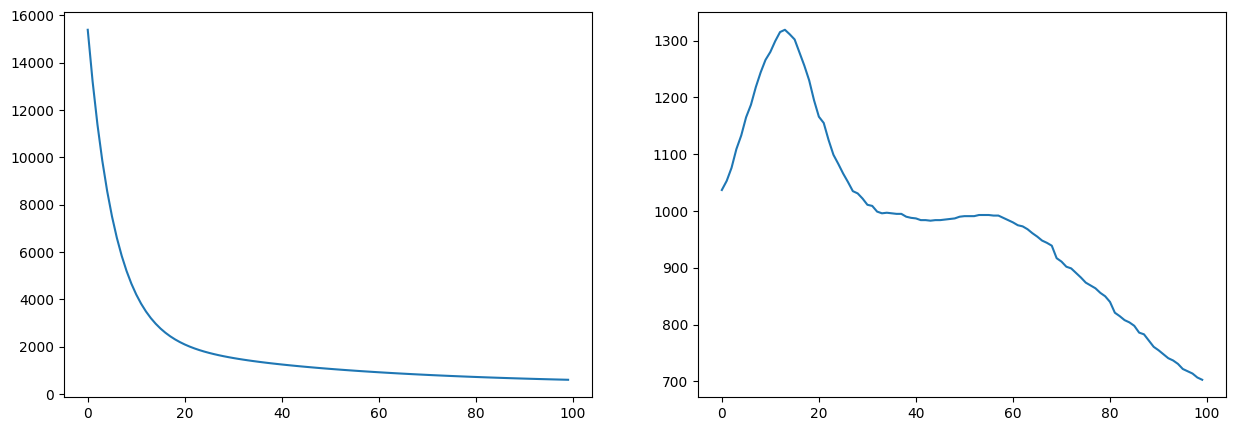

In [27]:
# subplot
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# polt sum of squared errors per epoch
axs[0].plot(range(sse_epoch.size), sse_epoch)

# plot errors per epoch
axs[1].plot(range(errors_epoch.size), errors_epoch)